# CNN Practical 2: Cat Vs Dog Classification using custom CNN architecture
- Cat Vs Dog Classification is like the Hello World program in the space of CNN
- Dataset is available in: https://www.kaggle.com/datasets/salader/dogs-vs-cats
- Sunny was facing some difficulty during live lecture that why we he did this in local. You may do it in Google Colab
  using the 3rd apprach as discussed in the last lecture
- Dataset has 2 folder Train and Test and within each of these folder there are 2 sub folder cat and dog capturing their
  respective images

In [3]:
#We will be using Tensorflow for this implementation. Keras in the UI on top of tensorflow which makes implementation easy.
#That why we need to install the lastest version of Keras as well

!pip install keras==2.12.0

In [1]:
#Importing basic pythonic libraries

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

# "Below we have read the dataset which internally used Generator concept"

# Ques: What is the use of the generator in real time?
# Ans: To use the memory efficiently by not loading the data in one shot but in an iterative approach


In [10]:
# internally it is using generator concept which is there in python

#Below directory represents the path where respective train or test dataset(images) are being stored,
#batch_size represents the number of images that needs to be read or decoded in single sort --> Generator concept,
#image_size represents the size into which images will be decoded. 256X256 can be treated as the standard size,
#by setting labels="inferred" we are instructing to create labels for classification based in directory structure which 
#means that like if we see under traning_set we have 2 sub folders cat and dog. So when we set label_mode="int" then these 2
#subfolders will become integer labeled in alphabetical order. Means cat will be labeled as 0 whereas, dog will be labeled
#as 1

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'C:\Complete_Content\Navin_HYD\DataSet\DeeplearningDS\cat-dog\training_set',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
    
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'C:\Complete_Content\Navin_HYD\DataSet\DeeplearningDS\cat-dog\test_set',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

    
)

#Observe below that image_dataset_from_directory objects returns the summarized text of imported dataset
#8000 files represents the images in train_set split or folder
#Whereas, 2000 files represents the images in test_set split or folder
#So, in total we are having 10000 images in Dog-Vs-Cat dataset

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [12]:
#Here we can clearly observe that the images that we have read from the dataset is decoded in the form of numpy array
#representing the respective pixel representation

for i in train_ds:
    print(i)
    
#Observe shape is coming as (32, 256, 256, 3) where 32 represents the batch size 256,256 size in which image got decoded
#and 3 represents the channel(RGB--> Colored)

#Also, note that there will be multiple bacthed of read images in the batch of 32. Means if scroll down will see many
#numpy array all having the shape of (32,256,256,3)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[254.       , 249.       , 255.       ],
         [254.       , 249.       , 255.       ],
         [254.       , 249.       , 255.       ],
         ...,
         [ 27.913296 ,  42.913296 ,  72.20473  ],
         [ 28.576172 ,  42.115486 ,  78.0963   ],
         [ 29.647503 ,  41.757812 ,  83.75781  ]],

        [[254.       , 249.       , 255.       ],
         [254.       , 249.       , 255.       ],
         [254.       , 249.       , 255.       ],
         ...,
         [ 26.492535 ,  41.929688 ,  73.578125 ],
         [ 28.682396 ,  44.205235 ,  79.10818  ],
         [ 30.38171  ,  44.25085  ,  84.15906  ]],

        [[254.       , 249.       , 255.       ],
         [254.       , 249.       , 255.       ],
         [254.       , 249.       , 255.       ],
         ...,
         [ 25.668114 ,  41.35554  ,  74.517654 ],
         [ 29.348698 ,  45.535503 ,  80.68785  ],
         [ 29.96561  ,  46.79883  ,  85.1621

# Normalization:
## Its important to normalize or shrink the respective decoded pixel representation within the same range. As this will make learning process more effective.

## We will simply divide the respective pixel representation by 255 which is the highest possible numeric value of a pixel, enforcing or compressing all the pixels within the range of [0,1]

In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)  #Normalized the Train dataset
validation_ds = validation_ds.map(process)  #Normalized the Test dataset

In [ ]:
# if i want to fast process

In [2]:
model=Sequential()

#Now making the Object of the sequential class and using this object to basically add different convoluted layers,
#pooling layers, flatten layer and finally ANN Dense layer

#Please note mostly first we perform convolution by adding convoluted layer which basically some kind of feature 
#extraction based on filters like: Horizontal or Vertical Edge detection then applying Pooling ontop of it to extract the
#important pixel based on use case(Max, Min, Global). This is done multiple times and at last we flaten the resultant set
#of features and pass it to the Neural Network

In [3]:
#Please note that input_shape will be defined in only first convolution layer

# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) #32 represents no. of kernels or filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification. And since this is binary classification we are using Sigmoid
model.add(Dense(1,activation='sigmoid'))

#Please note that in last output layer we have only 1 neuron since we are doining binary classification. In case we 
#wanted to do classification in 3 different classses then no. of neurons would be feeded as 3 similarly for 4 and so on.
#In that case activation function would also have changed

In [4]:
model.summary()

#Observe below summary carefully
#Please note that Filters or Kernel are only learable and not Pooling layers parameters. This is the reason why we have
#non zero trainable parameters in convoluted layers whereas we are having 0 learning parameteres in pooling layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [14]:
#Here using compile we are adding optimizer, loss function and peroformance measurement metric which will be utilized
#by the ANN layer

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
#Finally our CNN model is ready hence now we are starting the learning process by feeding the train dataset on top of it

model.fit(train_ds,epochs=2,validation_data=validation_ds)

Epoch 1/2
250/250 [==============================] - 567s 2s/step - loss: 0.7132 - accuracy: 0.5689 - val_loss: 0.6445 - val_accuracy: 0.6460
Epoch 2/2
250/250 [==============================] - 567s 2s/step - loss: 0.6098 - accuracy: 0.6733 - val_loss: 0.6402 - val_accuracy: 0.6515


# Now we will be performing prediction or intended image based classification on top of some sample images using our trained CNN model

## Please note that During training when we mentioned the input size as 256X256 (Standard) then it automatically did resizing or decoding when we read the dataset. But when we are doining prediction then we need to embed some kind of functionality explicitly on the of image that we want to predict or classify, that can actually resize the image into 256 X 256. This is because when deifining our CNN model we made it to understand images in 256X256 format


In [20]:
import matplotlib.pyplot as plt

In [24]:
dog_image=plt.imread(r"C:\Complete_Content\Navin_HYD\DataSet\DeeplearningDS\cat-dog\single_prediction\cat_or_dog_1.jpg")

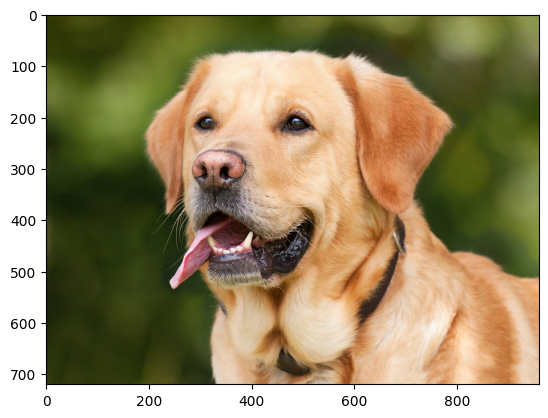

In [25]:
plt.imshow(dog_image)

In [26]:
cat_image=plt.imread(r"C:\Complete_Content\Navin_HYD\DataSet\DeeplearningDS\cat-dog\single_prediction\cat_or_dog_2.jpg")

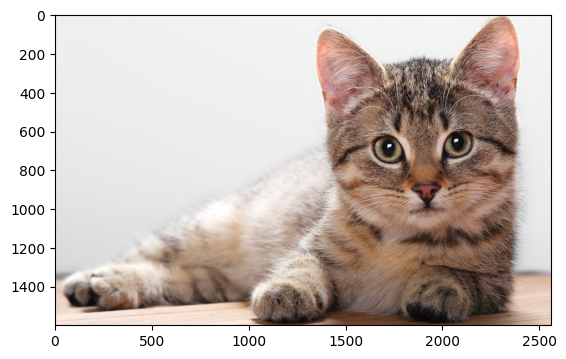

In [27]:
plt.imshow(cat_image)

In [28]:
dog_image.shape

(720, 960, 3)

In [29]:
cat_image.shape

(1600, 2560, 3)

In [30]:
#Here we are basically resizing the image on top of which prediction or classification needs to be made into the format
#(256X256) that our model understands

import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [31]:
dog_resize.shape

(256, 256, 3)

In [33]:
cat_resize.shape

(256, 256, 3)

In [34]:
dog_resize=dog_resize.reshape((1,256,256,3)) #Resizing further and reason was already discussed in the last lecture
                                             #Where 1 represents the number of images

In [35]:
dog_resize.shape

(1, 256, 256, 3)

In [36]:
cat_resize=cat_resize.reshape((1,256,256,3)) #Resizing further and reason was already discussed in the last lecture
                                             #Where 1 represents the number of images

In [39]:
pred=model.predict(dog_resize)

1/1 [==============================] - 0s 100ms/step


In [38]:
model.predict(cat_resize)

#See .predict() will return the numpy array. If it is 0 then in represents the cat and if 1 then it represents the dog
#This mapping is automatically done based or directory and it's alphabetical order when we set label="infered" and
#label_type="int"

1/1 [==============================] - 0s 104ms/step


array([[0.]], dtype=float32)

In [40]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of dog


# Assignement father mother sis bro yours grand father/mother image classification using CNN by collection 100 pictures of each and then preparing the folder strcture.

Here, we can actually automate the image collection process using following methods
1. Automatic image collection using open cv https://www.youtube.com/watch?v=c4l0-W67SlQ ; https://www.youtube.com/watch?v=DtmxYvKV9hc

2. Another way of automating the image collection is web scrapping

3. Use data augumentation

